In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import joblib

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn_extra.cluster  import KMedoids
from sklearn.preprocessing import RobustScaler


In [4]:
data = pd.read_csv('data/Customer_Data_Processed.csv', sep=',')
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.706404,-0.096365,-0.360201,0.259907,-0.461199,-0.149359,-0.022136,-0.174313,0.721663,-0.943983,0.666667,-0.831933,0.674718,-0.001738,-0.356376,0.804098,-0.333333
1,0.075457,0.855976,0.554035,-0.911285,0.513621,0.746618,0.527013,-0.713970,0.159355,0.170412,-0.148148,-0.168067,0.242031,-0.841000,0.543236,-0.186756,0.333333
2,-0.767884,-0.224286,-0.277162,0.260246,-0.482262,-0.497470,-0.176037,0.183976,0.591893,-0.901636,-0.148148,-0.781513,-0.726723,0.160748,-0.394892,0.941998,-0.333333
3,0.191021,0.918701,0.889008,-0.851900,0.548651,0.818332,0.857051,-0.630162,-0.358285,0.198539,0.222222,0.050420,-0.194601,-0.904274,0.506117,-0.103139,0.666667
4,0.045087,0.706886,0.767803,-0.894535,0.556992,0.514631,0.898597,-0.478037,-0.269085,0.028564,0.777778,0.336134,-0.140526,-0.789773,0.360487,-0.071436,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.624868,-0.125160,-0.301170,0.176413,-0.478302,-0.307974,-0.094401,0.014804,0.744291,-0.948332,-0.259259,-0.630252,0.964277,0.162969,-0.532440,0.906252,-0.333333
8632,0.070804,0.670512,0.591432,-0.925578,0.526027,0.594241,0.556441,-0.648191,-0.207554,-0.015968,0.481481,-0.050420,-0.904121,-0.880302,0.684994,-0.262969,0.666667
8633,0.470182,-0.204803,-2.095708,0.055416,0.026279,-0.168947,-0.216634,0.535351,0.279126,0.145210,-1.148148,-0.210084,-4.189564,0.099623,0.228162,-0.633106,0.000000
8634,0.371711,-0.331669,-1.472036,0.028111,0.101562,-0.222853,-0.146259,0.684382,0.003808,0.138643,-0.777778,0.016807,-3.166931,0.000306,0.060401,-0.720327,0.000000


In [6]:
robust_scaler = joblib.load('obj/robust_scaler.joblib')
type(robust_scaler)

sklearn.preprocessing._data.RobustScaler

In [7]:
# Agrupacion k-medias y k-medoides
def elbow_plot(X, model, k_min=2, k_max=10):
    """
    Genera la gráfica para el método del codo usando KMeans
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    inertias = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, metric='manhattan', random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el valor de inercia
        inertias.append(model_k.inertia_)
    
    # Graficamos los valores de inercia
    plt.plot(range(k_min,k_max+1), inertias, marker='o')
    plt.xlabel('Número de clústeres')
    plt.ylabel('Inercia')
    plt.grid()
    plt.show()

In [8]:
def silhouette_plot(X, model, k_min=2, k_max=5):
    """
    Genera la gráfica con el coeficiente de la silueta
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    scores = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(X, model_k.labels_)
        scores.append(score)
    # Mostramos los valores de los coeficientes
    display(pd.DataFrame({'K': range(k_min,k_max+1), 'Coeficiente': scores}))
    # Graficamos los valores del coeficiente de la silueta
    plt.plot(range(k_min,k_max+1), scores, marker='o')
    plt.xlabel('Número de clústeres')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

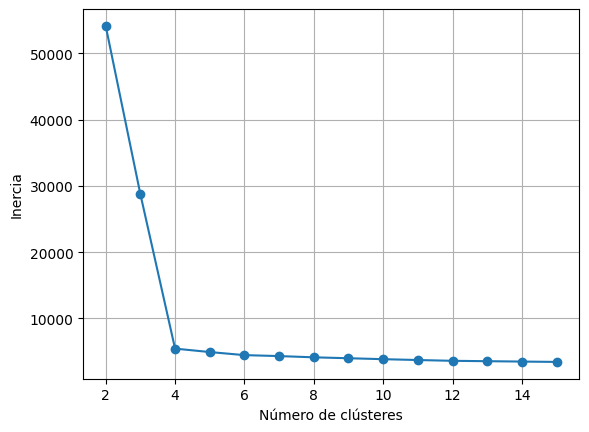

In [9]:
elbow_plot(data, "kmeans", 2, 15)

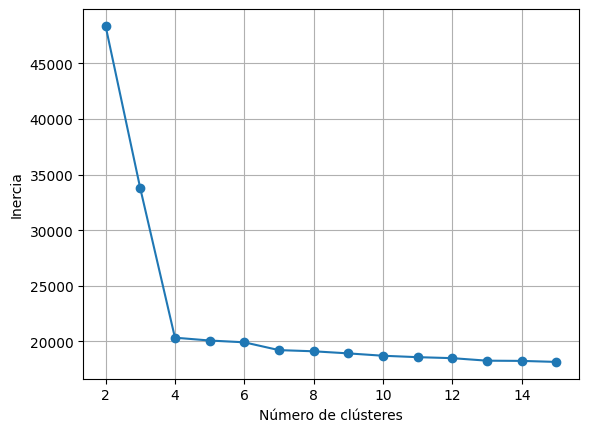

In [10]:
elbow_plot(data, "kmedoids", 2, 15)

,K,Coeficiente
0,2,0.465620
1,3,0.612184
2,4,0.751371
3,5,0.542615
4,6,0.342732
5,7,0.320296
6,8,0.236197
7,9,0.212678
8,10,0.150024


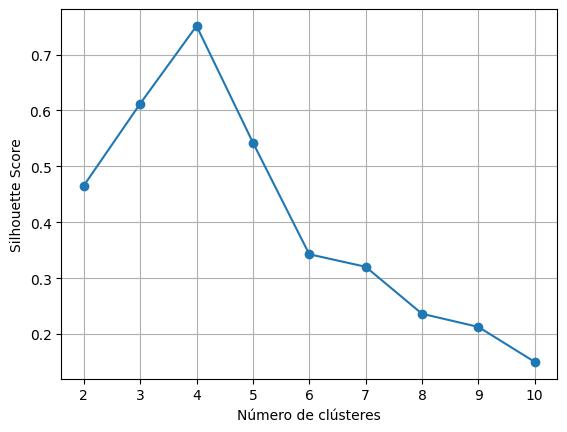

In [11]:
silhouette_plot(data, "kmeans", 2, 10)

,K,Coeficiente
0,2,0.435649
1,3,0.578283
2,4,0.751371
3,5,0.522388
4,6,0.521659
5,7,0.501052
6,8,0.503845
7,9,0.499031
8,10,0.499621


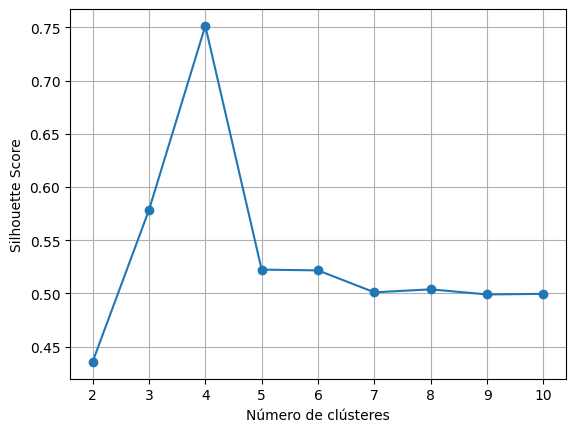

In [12]:
silhouette_plot(data, "kmedoids", 2, 10)

In [13]:
mejor_modelo = KMeans(n_clusters=4, random_state=0)
mejor_modelo.fit(data)

KMeans(n_clusters=4, random_state=0)

([<matplotlib.axis.XTick at 0x351d881c0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

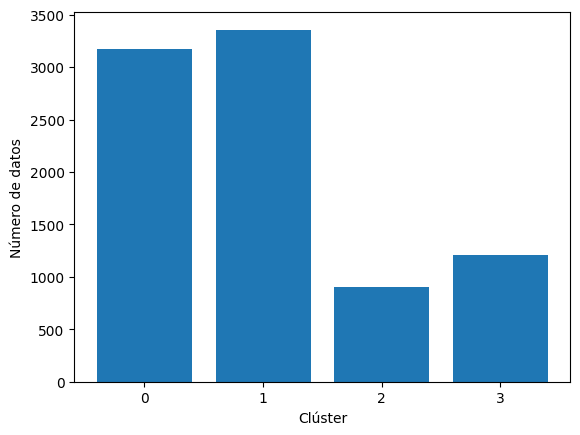

In [14]:
labels = mejor_modelo.labels_
indexes, values = np.unique(labels, return_counts=True)
rects = plt.bar(indexes, values)
plt.xlabel('Clúster')
plt.ylabel('Número de datos')
plt.xticks(indexes)

In [15]:
{indexes[i]: values[i] for i in range(len(indexes))}

{0: 3171, 1: 3356, 2: 903, 3: 1206}

In [16]:
centroids_array = mejor_modelo.cluster_centers_
centroids_original = robust_scaler.inverse_transform(centroids_array)
centroids = pd.DataFrame(centroids_original, columns=data.columns)
centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4451.126307,0.193317,29747.057865,35140.273594,3313.474410,11129.239338,0.425684,0.567289,0.838328,0.201070,80.939451,85.725008,15523.980921,24623.728686,32951.234081,0.837494,6.363923
1,13252.473365,0.775734,40656.032468,6132.662569,19462.256862,37231.770958,0.797725,0.227979,0.534946,0.990844,92.581049,206.825089,14534.185216,8548.249145,58146.385395,0.363650,9.859058
2,3105.917172,0.583910,26323.521692,31054.681489,10485.803990,9355.103901,0.206352,0.797868,0.178405,1.314128,29.837209,284.805094,26109.000090,43726.525314,17429.339551,0.723273,10.598007
3,16285.111896,0.181718,7392.765979,31408.672313,10932.107057,21763.987743,0.513926,0.702533,0.642639,0.990455,52.631841,166.533167,4386.390604,20649.435423,55187.141515,0.149516,7.826700
